In [79]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [80]:
# convert all csv files with our data to Pandas DataFrames
df = pd.read_csv('data.csv') # full data
df2 = pd.read_csv('diff.csv') # difference from 0
df3 = pd.read_csv('log.csv') # logarithmically-transformed data

# remove not a number values
df = df.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

# show the dataframes
print(df)
print(df2)
print(df3)

    sec        mm^2
0   390   16.091000
1   360   27.557000
2   330   20.332000
3   300   71.765000
4   270  241.475000
5   240  359.946000
6   210  222.280000
7   180  312.323000
8   150  329.128000
9   120  415.886000
10   90  205.125000
11   60  265.645000
12   50  314.652000
13   40  275.402000
14   10  210.349000
15    0  388.192000
16  420   68.751000
17  390   55.969167
18  360   62.709833
19  330    4.687000
20  300    9.802000
21  270   50.756000
    sec  diff_from_0
0   390   372.101000
1   360   360.635000
2   330   367.860000
3   300   316.427000
4   270   146.717000
5   240    28.246000
6   210   165.912000
7   180    75.869000
8   150    59.064000
9   120   -27.694000
10   90   183.067000
11   60   122.547000
12   50    73.540000
13   40   112.790000
14   10   177.843000
15    0     0.000000
16  420   744.706000
17  390   757.487833
18  360   750.747167
19  330   808.770000
20  300   803.655000
21  270   762.701000
    sec  log_of_mm^2
0   390     2.778260
1   360     3.3

In [81]:
# turn the independent (x) and dependent (y) values on the table into numpy arrays 

# full data
x = np.array(df['sec']).reshape(-1, 1) # use .reshape(-1, 1) to format it 
y = np.array(df['mm^2']).reshape(-1, 1) # use .reshape(-1, 1) to format it 

# difference from 0
x2 = np.array(df2['sec']).reshape(-1, 1)
y2 = np.array(df2['diff_from_0']).reshape(-1, 1)

# logarithmic transformed data
x3 = np.array(df3['sec']).reshape(-1, 1)
y3 = np.array(df3['log_of_mm^2']).reshape(-1, 1)

In [102]:
# fit the linear regression
reg = LinearRegression().fit(x, y)
reg2 = LinearRegression().fit(x2, y2)
reg3 = LinearRegression().fit(x3, y3)

# display relevant statistics
#Full Data
print("Full Data")
print("Coefficent of determination: ", reg.score(x, y)) # display the coefficient of determination (R squared)
print("Regression coefficient: ", reg.coef_[0, 0]) # display the slope of the regression line (regression coefficient)
print("Intercept of Regression Line: ", reg.intercept_[0])
dfc = pd.DataFrame(df.corr(method='pearson')) # convert the correlation coefficients to a dataframe 
print("Correlation coefficient: ", dfc.iat[0, 1]) # display the correlation coefficient (r) between the x and y variables

# Difference
print("\nData Subtracted from Control")
print("Coefficent of determination: ", reg2.score(x2, y2)) # display the coefficient of determination (R squared)
print("Regression coefficient: ", reg2.coef_[0, 0]) # display the slope of the regression line (regression coefficient)
print("Intercept of Regression Line: ", reg2.intercept_[0])
dfc2 = pd.DataFrame(df2.corr(method='pearson')) # convert the correlation coefficients to a dataframe 
print("Correlation coefficient: ", dfc2.iat[0, 1]) # display the correlation coefficient (r) between the x and y variables

#Log model
print("\nLogarithmic Model")
print("Coefficent of determination: ", reg3.score(x3, y3)) # display the coefficient of determination (R squared)
print("Regression coefficient: ", reg3.coef_[0, 0]) # display the slope of the regression line (regression coefficient)
print("Intercept of Regression Line: ", reg.intercept_[0])
dfc3 = pd.DataFrame(df3.corr(method='pearson')) # convert the correlation coefficients to a dataframe 
print("Correlation coefficient: ", dfc3.iat[0, 1]) # display the correlation coefficient (r) between the x and y variables


Full Data
Coefficent of determination:  0.6120412609202067
Regression coefficient:  -0.8075867411379077
Intercept of Regression Line:  357.3532013337096
Correlation coefficient:  -0.782330659580849

Data Subtracted from Control
Coefficent of determination:  0.5353455336538143
Regression coefficient:  1.6118238293310316
Intercept of Regression Line:  -31.208684038278363
Correlation coefficient:  0.7316731057335742

Logarithmic Model
Coefficent of determination:  0.5242731184651914
Regression coefficient:  -0.007085942568628112
Intercept of Regression Line:  357.3532013337096
Correlation coefficient:  -0.7240670676568514


In [103]:
# predict the y values
y_pred = reg.predict(x)
y2_pred = reg2.predict(x2)
y3_pred = reg3.predict(x3)

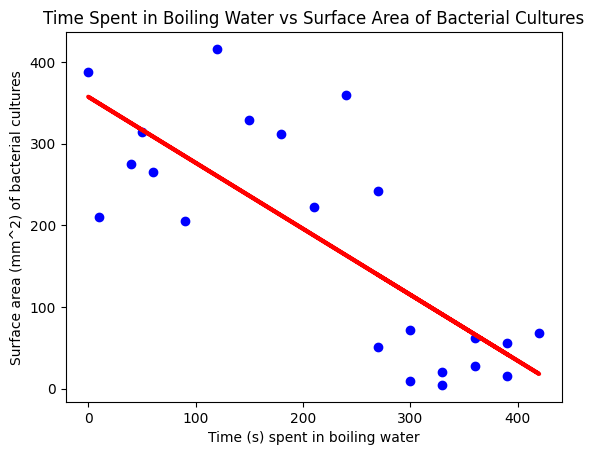

In [104]:
# Plot the model of the full data
plt.scatter(x, y, color="blue") # plot the data points as a scatter plot
plt.plot(x, y_pred, color="red", linewidth=3) # plot the line of best fit

plt.title("Time Spent in Boiling Water vs Surface Area of Bacterial Cultures") # display the title
plt.xlabel("Time (s) spent in boiling water") # label the x axis
plt.ylabel("Surface area (mm^2) of bacterial cultures") # label the y axis

plt.show() # display the graph

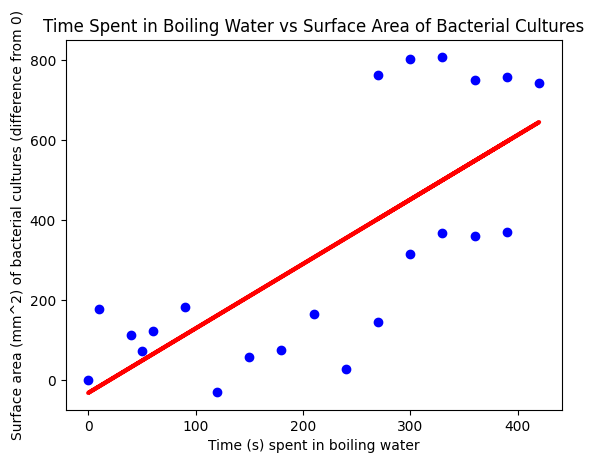

In [105]:
# Model of the difference data
plt.scatter(x2, y2, color="blue") # plot the data points as a scatter plot
plt.plot(x2, y2_pred, color="red", linewidth=3) # plot the line of best fit

plt.title("Time Spent in Boiling Water vs Surface Area of Bacterial Cultures") # display the title
plt.xlabel("Time (s) spent in boiling water") # label the x axis
plt.ylabel("Surface area (mm^2) of bacterial cultures (difference from 0)") # label the y axis

plt.show() # display the graph

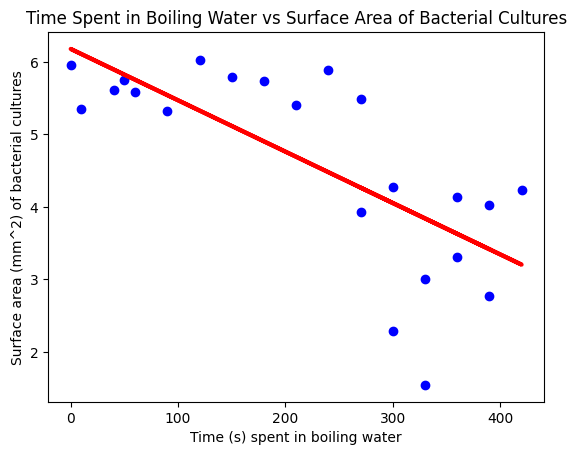

In [106]:

# Model of the log model
plt.scatter(x3, y3, color="blue") # plot the data points as a scatter plot
plt.plot(x3, y3_pred, color="red", linewidth=3) # plot the line of best fit

plt.title("Time Spent in Boiling Water vs Surface Area of Bacterial Cultures") # display the title
plt.xlabel("Time (s) spent in boiling water") # label the x axis
plt.ylabel("Surface area (mm^2) of bacterial cultures") # label the y axis

plt.show() # display the graph


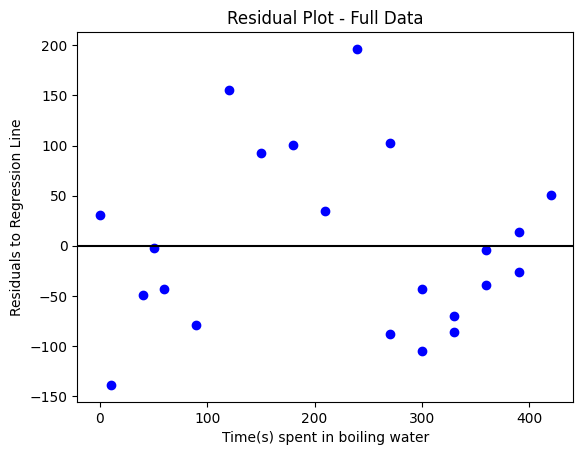

In [107]:
#Residual plots
# Full Data
plt.scatter(x, y-y_pred, color="blue") # 
plt.axhline(y=0, color="black",linestyle="-")

plt.title("Residual Plot - Full Data")
plt.xlabel("Time(s) spent in boiling water")
plt.ylabel("Residuals to Regression Line")

plt.show()

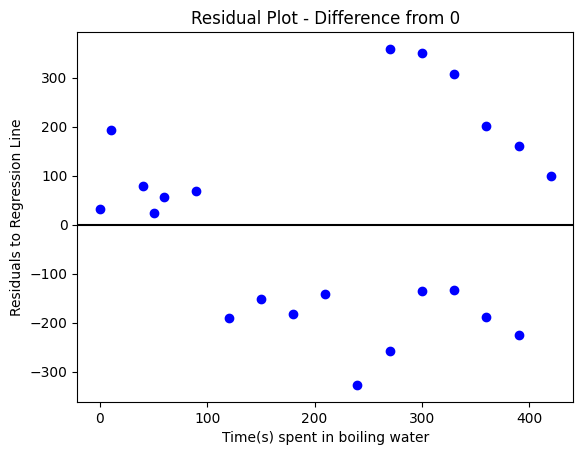

In [108]:
# Difference
plt.scatter(x2, y2-y2_pred, color="blue") # 
plt.axhline(y=0, color="black",linestyle="-")

plt.title("Residual Plot - Difference from 0")
plt.xlabel("Time(s) spent in boiling water")
plt.ylabel("Residuals to Regression Line")

plt.show()

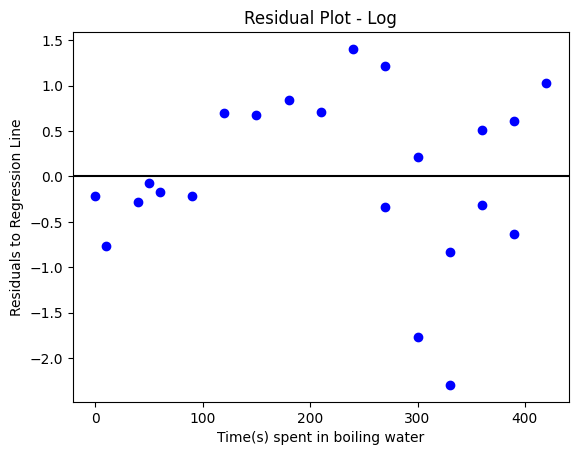

In [110]:
# Log Model 
plt.scatter(x3, y3-y3_pred, color="blue") # 
plt.axhline(y=0, color="black",linestyle="-")

plt.title("Residual Plot - Log")
plt.xlabel("Time(s) spent in boiling water")
plt.ylabel("Residuals to Regression Line")

plt.show()